<a href="https://colab.research.google.com/github/DivinitasMaxima/BINA-REPO/blob/main/3_Daten_sammeln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: black; text-align: left;"><b>3. Daten sammeln</b></h1>
<p style="font-size: 16px; line-height: 1.5;">
Eine systematische und strukturierte Datensammlung ist der Grundstein für die spätere Analyse und Entscheidungsfindung. Im folgenden Kapitel werden die verschiedenen Aspekte des Datenbeschaffungsprozesses behandelt.
</p>
<h2 style="color: black; text-align: left;"><b>3.1. Einleitung</b></h2>
<p style="font-size: 16px; line-height: 1.5;">
Die Fluggesellschaft möchte die Faktoren verstehen, die die Kundenzufriedenheit beeinflussen, und Strategien identifizieren, um das Kundenerlebnis zu verbessern. Leider gibt American Airlines keine konkreten Zahlen zu Kundenumfragen oder anderen relevanten Statistiken heraus. Aus diesem Grund bedient sich die Projektgruppe öffentlich zugänglicher, anonymisierter Daten von Kaggle, einer Plattform, die über 50.000 Datensätze zu verschiedensten Themen bietet (Kaggle, o. J.). Die Projektgruppe nutzt diese anonymisierten Datensätze gezielt und wendet sie auf American Airlines an, um daraus relevante Erkenntnisse abzuleiten.

Die Projektgruppe arbeitet mit den folgenden Datenquellen:
<ol>
    <li>Kundenzufriedenheitsumfrage XX (Annahme, dass diese Umfrage von American Airlines durchgeführt wurde) QUELLE</li>
    <li>Flugverspätungen: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay/code</li>
    <li>Grösste Flughäfen nach Passagieraufkommen zwischen 2016 und 2020: https://www.kaggle.com/datasets/khaiid/most-crowded-airports</li>
    <li>XX (weitere relevante Datensätze, die später spezifiziert werden) QUELLE</li>
</ol>

</p>
<hr>
<h2 style="color: black; text-align: left;"><b>3.2. Datenqualität</b></h2>
<h3 style="color: black; text-align: left;"><b>Kundenzufriedenheit</b></h3>
<p>
Um datenbasierte Erkenntnisse über die Zufriedenheit der Passagiere zu gewinnen wurde der Datensatz "Invistico_Airline" geladen. Ein Ziel der Analyse ist es, die wichtigsten Einflussfaktoren auf die Kundenzufriedenheit zu identifizieren, und daraus konkrete Optimierungsmaßnahmen für die Airline abzuleiten. Der genannte Datensatz enthält dabei über 100000 Kundenbewertungen mit Informationen zur:
</p>


| Spalte  | Typ  | Relevanz  |
|-----------|-----------|-----------|
| satisfaction    | satisfied / unsatisfied    |    |
| Gender  | male / female    |      |
| Customer Type | Loyal Customer / disloyal Customer |     |
| Age    | #    |     |
| Type of Travel    | Personal Travel / Business Travel    |     |
| Class    | Business / Eco / Other    |    |
| Flight Distance    | # in Meilen    |    |
| Seat comfort    | 1 - 5    |    |
| Departure/Arrival time convenient    | 1 - 5    |    |
| Food and drink   | 1 - 5    |    |
| Gate location   | 1 - 5    |    |
| Inflight wifi service   | 1 - 5    |    |
| Inflight entertainment   | 1 - 5   |    |
| Online support   | 1 - 5   |    |
| Ease of Online booking   | 1 - 5    |    |
| On-board service   | 1 - 5    |    |
| Leg room service   | 1 - 5    |    |
| Baggage handling   | 1 - 5    |    |
| Checkin service   | 1 - 5    |    |
| Cleanliness   | 1 - 5    |    |
| Online boarding   | 1 - 5    |    |
| Departure Delay in Minutes   | in Min    |    |
| Arrival Delay in Minutes   | in Min    |    |




Zuerst werden alle Datensätze aus Kaggle und heruntergeladene Dateien geladen.

In [2]:
# Datensätze von Kaggle herunterladen
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path_zufriedenheit = "Invistico_Airline.csv"
file_path_airlines_delay = "airlines_delay.csv"
file_path_crowded_airports = "Airports.csv"

# Kundenzufriedenheit
df_zufriedenheit = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sjleshrac/airlines-customer-satisfaction",
  file_path_zufriedenheit,
)

# Verspätungen
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path_airlines_delay,
)

# Flughäfen
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path_crowded_airports,
)

<ipython-input-2-1d6e49fdbe6c>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_zufriedenheit = kagglehub.load_dataset(


100%|██████████| 1.64M/1.64M [00:00<00:00, 2.11MB/s]

Extracting zip of Invistico_Airline.csv...



<ipython-input-2-1d6e49fdbe6c>:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_airlines_delay = kagglehub.load_dataset(
<ipython-input-2-1d6e49fdbe6c>:24: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_crowded_airports = kagglehub.load_dataset(


Bevor mit der eigentlichen Analyse begonnen werden konnte, wurden die Daten sorgfältig bereinigt und vorbereitet. Dies geschah damit die Ergebnisse möglichst zuverlässige und aussagekräftige sind. So wurden zuerst geprüft ob mögliche Fehlende Werte im Datensatz vorhanden waren, damit diese entfernt werden können.

In [5]:
# Analyse von fehlenden Daten in allen Datensätzen
print('-----df_zufriedenheit-----')
print(df_zufriedenheit.isnull().sum())
print('-----df_airlines_delay-----')
print(df_airlines_delay.isnull().sum())
print('-----df_crowded_airports-----')
print(df_crowded_airports.isnull().sum())

# Wenn man möchte, kann man sich hier die fehlenden Werte anzeigen lassen
# df_zufriedenheit[df_zufriedenheit.isnull().any(axis=1)]


-----df_zufriedenheit-----
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
-----df_airlines_

Erkenntnisse hier

In [10]:
# Analyse von doppelten Einträgen in allen Datensätzen
duplicates_zufriedenheit = df_zufriedenheit[df_zufriedenheit.duplicated()]
print('-----df_zufriedenheit-----')
print(f"Anzahl der doppelten Zeilen: {duplicates_zufriedenheit.shape[0]}")
# duplicates_zufriedenheit
print('-----df_airlines_delay-----')
duplicates_airlines_delay = df_airlines_delay[df_airlines_delay.duplicated()]
print(f"Anzahl der doppelten Zeilen: {duplicates_airlines_delay.shape[0]}")
# Wenn man möchte, kann man sich hier die doppelten Werte anzeigen lassen
# duplicates_airlines_delay
print('-----df_crowded_airports-----')
duplicates_crowded_airports = df_crowded_airports[df_crowded_airports.duplicated()]
print(f"Anzahl der doppelten Zeilen: {duplicates_crowded_airports.shape[0]}")
# duplicates_crowded_airports

-----df_zufriedenheit-----
Anzahl der doppelten Zeilen: 0
-----df_airlines_delay-----
Anzahl der doppelten Zeilen: 216618
-----df_crowded_airports-----
Anzahl der doppelten Zeilen: 0


Erkenntnisse hier

In [11]:
# Analyse von statistischen Ausreissern
print('-----df_zufriedenheit-----')
print(df_zufriedenheit.describe())
print('-----df_airlines_delay-----')
print(df_airlines_delay.describe())
print('-----df_crowded_airports-----')
print(df_crowded_airports.describe())

-----df_zufriedenheit-----
                 Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%               

Erkenntnisse hier!

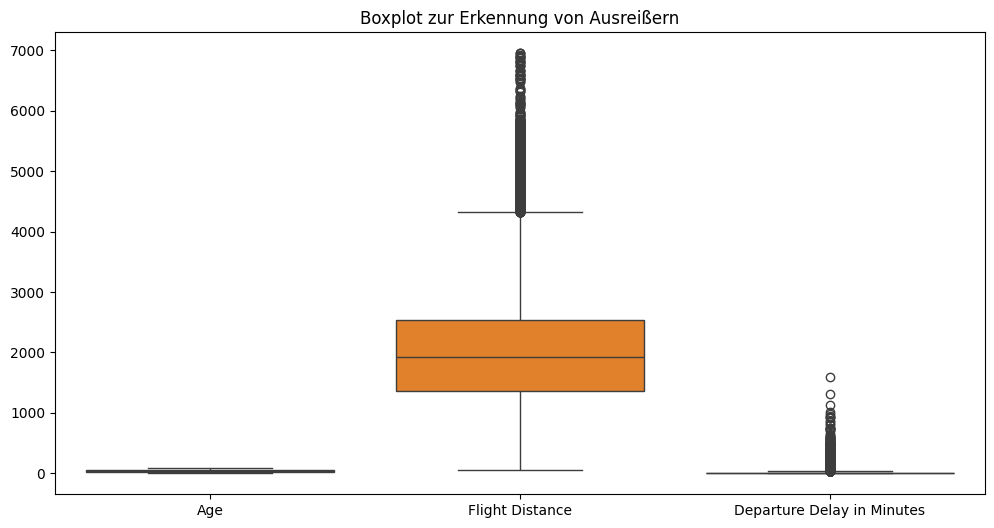

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_zufriedenheit[["Age", "Flight Distance", "Departure Delay in Minutes"]])
plt.title("Boxplot zur Erkennung von Ausreissern")
plt.show()


Sich die Werte ab ca. 4500 anzeigen lassen